# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime
from scipy.stats import linregress



# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
output_data_file = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print (f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}&q={city}"

  
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        
        city_lat = city_weather['coord']['lat']
        city_lon = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_clouds = city_weather['clouds']['all']
        city_humidity = city_weather['main']['humidity']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
    
       

        # Append the City information into city_data list
                           
        city_data.append({"City":  city, 
                          "Lat": city_lat, 
                          "Lng": city_lon, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date":city_date})
                             

        

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | utrik
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | hayma'
City not found. Skipping...
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | grand falls-windsor
Processing Record 9 of Set 1 | badger
Processing Record 10 of Set 1 | chonchi
Processing Record 11 of Set 1 | erenhot
Processing Record 12 of Set 1 | petropavlovsk-kamchatsky
Processing Record 13 of Set 1 | koryazhma
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | sitka
Processing Record 16 of Set 1 | nikol'sk
Processing Record 17 of Set 1 | byron bay
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | san antonio de pale
Processing Record 20 of Set 1 | tsiombe
Processing Record 21 of Set 1 | margaret river
Processing R

Processing Record 37 of Set 4 | touros
Processing Record 38 of Set 4 | saipan
Processing Record 39 of Set 4 | hatillo
Processing Record 40 of Set 4 | balkashino
Processing Record 41 of Set 4 | gizo
Processing Record 42 of Set 4 | jacmel
Processing Record 43 of Set 4 | inda silase
Processing Record 44 of Set 4 | dolores
Processing Record 45 of Set 4 | torghay
Processing Record 46 of Set 4 | itaituba
Processing Record 47 of Set 4 | port mathurin
Processing Record 48 of Set 4 | puerto ayora
Processing Record 49 of Set 4 | yemva
Processing Record 0 of Set 5 | penzance
Processing Record 1 of Set 5 | hobyo
Processing Record 2 of Set 5 | afaahiti
Processing Record 3 of Set 5 | nova sintra
Processing Record 4 of Set 5 | la passe
Processing Record 5 of Set 5 | polyarnyy
Processing Record 6 of Set 5 | taoudenni
Processing Record 7 of Set 5 | quibdo
Processing Record 8 of Set 5 | es castell
Processing Record 9 of Set 5 | kasempa
Processing Record 10 of Set 5 | island harbour
Processing Record 11 

Processing Record 31 of Set 8 | banposh
Processing Record 32 of Set 8 | remire-montjoly
Processing Record 33 of Set 8 | reggane
Processing Record 34 of Set 8 | carauari
Processing Record 35 of Set 8 | saint-philippe
Processing Record 36 of Set 8 | lagoa
Processing Record 37 of Set 8 | nuuk
Processing Record 38 of Set 8 | north bend
Processing Record 39 of Set 8 | christchurch
Processing Record 40 of Set 8 | okha
Processing Record 41 of Set 8 | altamira
Processing Record 42 of Set 8 | dazhong
Processing Record 43 of Set 8 | thief river falls
Processing Record 44 of Set 8 | bubaque
Processing Record 45 of Set 8 | novyy urengoy
Processing Record 46 of Set 8 | gongchangling
Processing Record 47 of Set 8 | ende
Processing Record 48 of Set 8 | banlung
Processing Record 49 of Set 8 | narharpur
City not found. Skipping...
Processing Record 0 of Set 9 | kununurra
Processing Record 1 of Set 9 | agat village
Processing Record 2 of Set 9 | arraial do cabo
Processing Record 3 of Set 9 | novodvinsk


Processing Record 23 of Set 12 | rock springs
Processing Record 24 of Set 12 | cabedelo
Processing Record 25 of Set 12 | suifenhe
Processing Record 26 of Set 12 | malvan
Processing Record 27 of Set 12 | kurumkan
Processing Record 28 of Set 12 | kirensk
Processing Record 29 of Set 12 | saveh
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,41.95,84,90,7.47,NZ,1692296852
1,utrik,11.2278,169.8474,82.69,74,37,11.65,MH,1692296852
2,puerto natales,-51.7236,-72.4875,34.25,60,20,4.61,CL,1692296853
3,iqaluit,63.7506,-68.5145,44.33,87,40,16.11,CA,1692296853
4,port-aux-francais,-49.3500,70.2167,33.73,69,91,42.73,TF,1692296855


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,41.95,84,90,7.47,NZ,1692296852
1,utrik,11.2278,169.8474,82.69,74,37,11.65,MH,1692296852
2,puerto natales,-51.7236,-72.4875,34.25,60,20,4.61,CL,1692296853
3,iqaluit,63.7506,-68.5145,44.33,87,40,16.11,CA,1692296853
4,port-aux-francais,-49.3500,70.2167,33.73,69,91,42.73,TF,1692296855


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

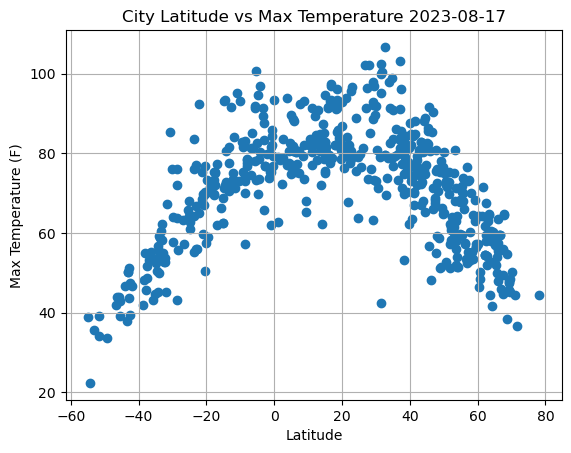

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = 'o')
 

# Incorporate the other graph propertiesx_values = weather_df['Latitude']
# y_values = city_data_df['Max Temp']
# plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs Max Temperature {time.strftime('%Y-%m-%d')}")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

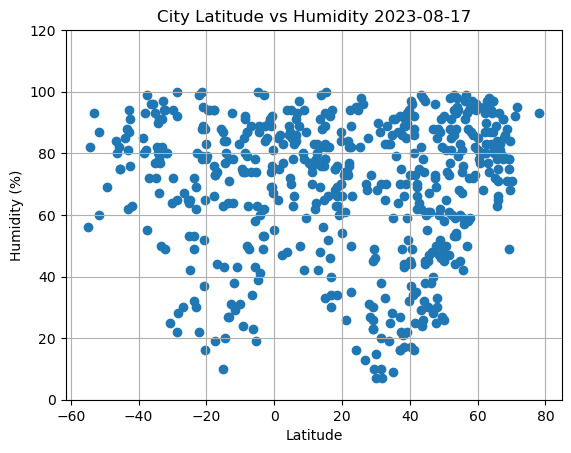

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = 'o')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity {time.strftime("%Y-%m-%d")}')
plt.ylim(0, 120)
plt.grid(True)



# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

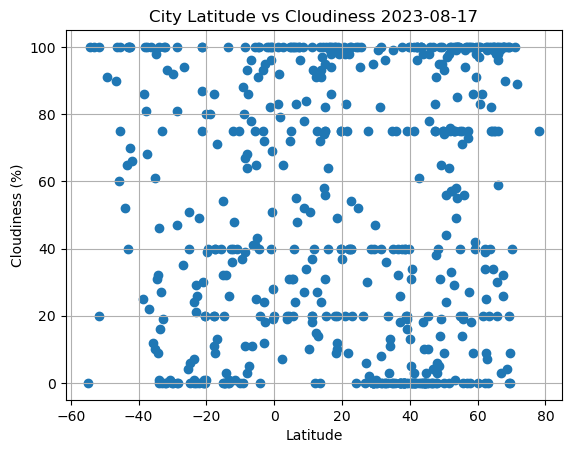

In [10]:
#Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker = 'o')

# Incorporate the other graph properties


plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness {time.strftime("%Y-%m-%d")}')
plt.grid(True)



#Save the figure
plt.savefig("../output_data/Fig3.png")

#Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

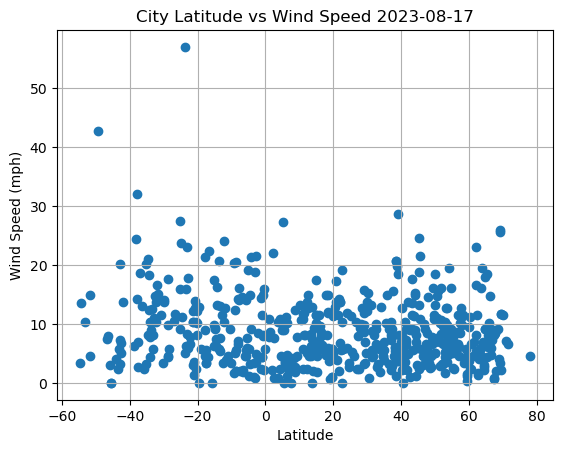

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = 'o')
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed {time.strftime("%Y-%m-%d")}')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
northern_hemisphere_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,utrik,11.2278,169.8474,82.69,74,37,11.65,MH,1692296852
3,iqaluit,63.7506,-68.5145,44.33,87,40,16.11,CA,1692296853
5,jamestown,42.0970,-79.2353,78.39,62,100,13.80,US,1692296765
6,grand falls-windsor,48.9332,-55.6649,75.51,62,31,4.81,CA,1692296857
7,badger,64.8000,-147.5333,58.14,80,100,9.22,US,1692296858


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,41.95,84,90,7.47,NZ,1692296852
2,puerto natales,-51.7236,-72.4875,34.25,60,20,4.61,CL,1692296853
4,port-aux-francais,-49.3500,70.2167,33.73,69,91,42.73,TF,1692296855
8,chonchi,-42.6128,-73.8092,47.41,76,70,6.85,CL,1692296859
12,adamstown,-25.0660,-130.1015,64.15,53,51,27.45,PN,1692296861


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.6936967874493605


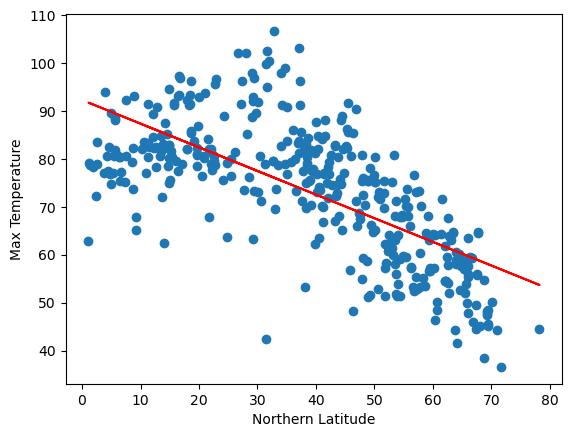

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,270),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.8464105043453233


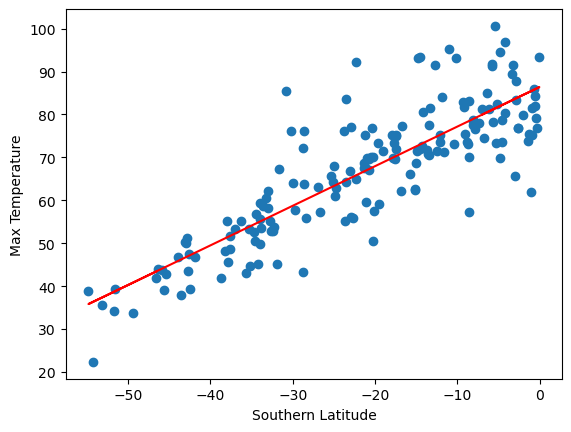

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,295),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** There is a negative linear relationship between max temperature and northern latitude and a positive linear relationship between the max temperature and soutern latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.1110695535838282


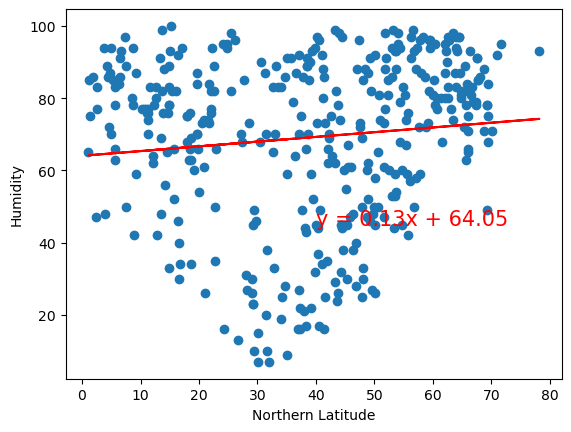

In [17]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.18191560347367822


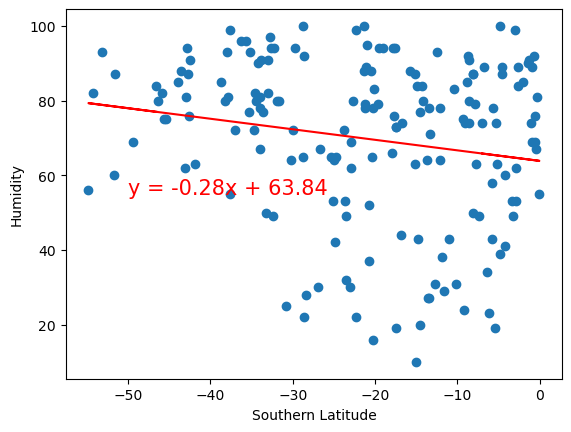

In [18]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** The humidity and latitude data is widely scatter.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.03302403493731886


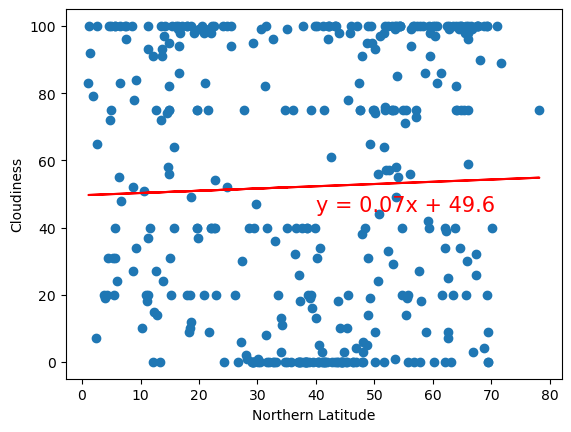

In [19]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.09041752390116566


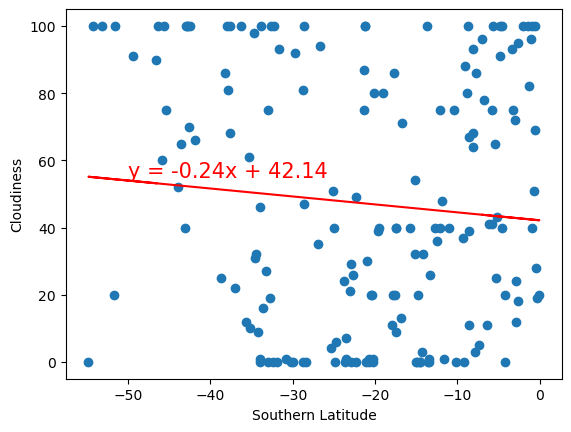

In [20]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.025888484167799455


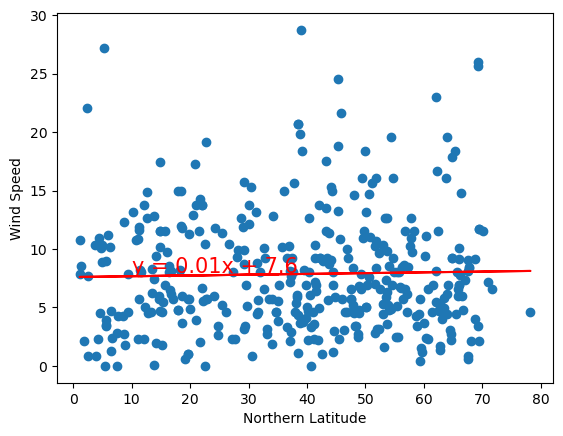

In [21]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,8),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.10939540013711281


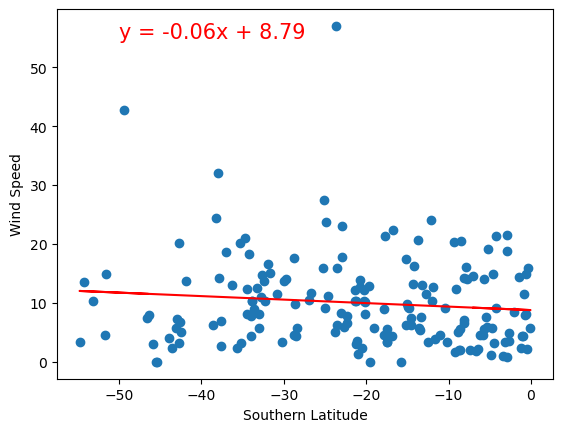

In [22]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** The wind speed and latitude don't share a linear relationship and we can see a few outliers. 